In [1]:
import json
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
def build_sensor_data(file_path):
    with open(file_path) as f:
        j = json.load(f)

    column_names = [el["name"] for el in j["rawDataBody"]["dataColumns"]]
    df = pd.DataFrame(j["rawDataBody"]["dataBlock"], columns=column_names)
    
    sensor_indexes = sorted(df["Sensor Index"].unique())
    
    sensors = {}
    for i in sensor_indexes:
        sensors[i] = {}
        sensor = df[df["Sensor Index"] == i]
        heater_indexes = sorted(sensor["Heater Profile Step Index"].unique())
        for j in heater_indexes:
            sensors[i][j] = sensor[sensor["Heater Profile Step Index"] == j]
    
    return sensors

In [3]:
s_01 = build_sensor_data("gunler/1/01.bmerawdata")
s_02 = build_sensor_data("gunler/1/02.bmerawdata")

In [4]:
def plot_sensor(group_name, sensors, sensor_idx):
    plt.figure(figsize=(12, 6))
    plt.title(f"{group_name} Sensor {sensor_idx}")
    plt.yscale("log")
    for profile_idx in sensors[sensor_idx]:
        plt.plot(sensors[sensor_idx][profile_idx]["Resistance Gassensor"],
                 label=f"p {profile_idx}")
    plt.legend()
    plt.show()

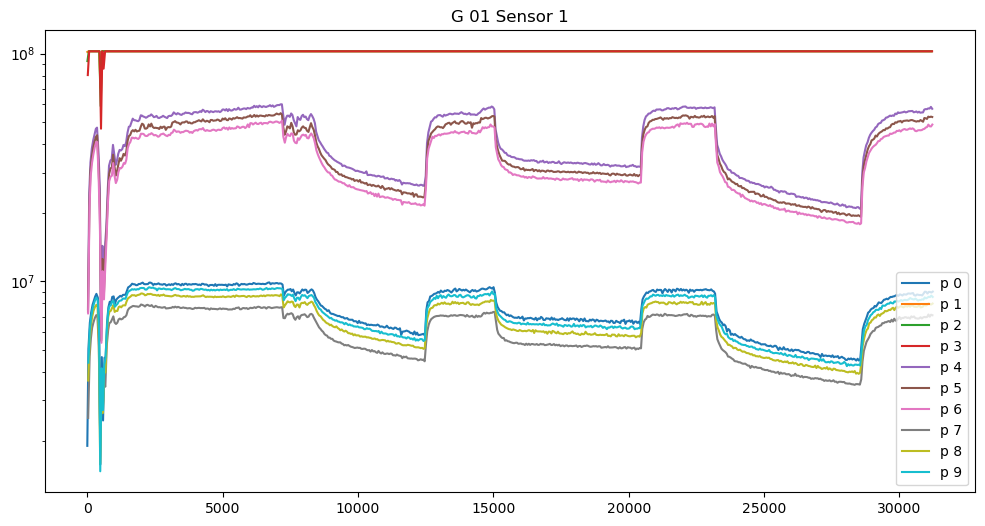

In [5]:
plot_sensor("G 01", s_01, 1)

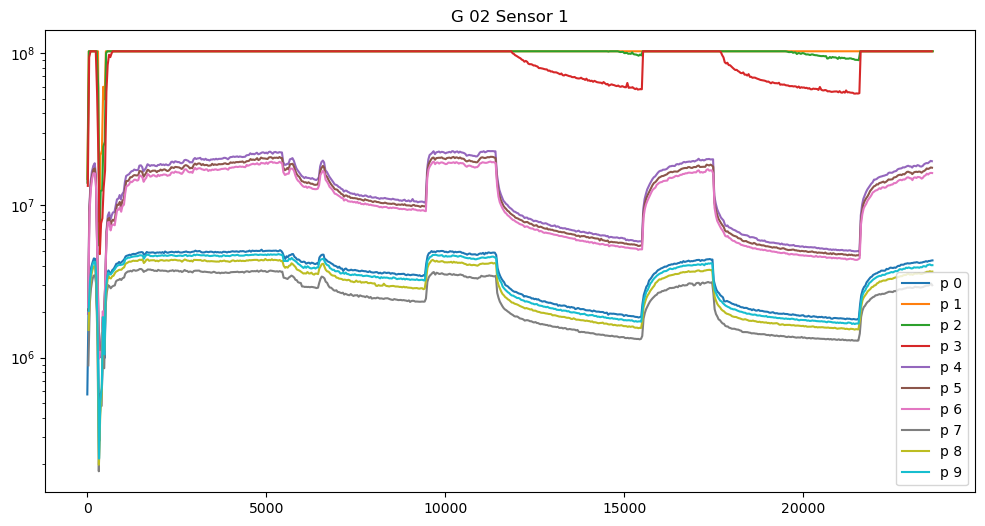

In [6]:
plot_sensor("G 02", s_02, 1)

In [7]:
def plot_sensor_it(group_name, sensors, sensor_idx):
    fig = go.Figure()

    for profile_idx in sensors[sensor_idx]:
        fig.add_trace(go.Scatter(x=sensors[sensor_idx][profile_idx]["Resistance Gassensor"].index,
                                 y=sensors[sensor_idx][profile_idx]["Resistance Gassensor"].values,
                                 mode="lines",
                                 name=f"p {profile_idx}"))

    fig.update_layout(title=f"{group_name} Sensor {sensor_idx}", height=700)
    fig.update_yaxes(type="log")
    fig.show()

In [8]:
plot_sensor_it("G 01", s_01, 1)